# Getting Started

Linear Regression is a supervised machine learning approach to analyse the relationship between a scalar response and one or more explanatory features or variables. The case of one explanatory variable is called Simple Linear regression and the case with multiple variables is called Multiple Linear Regression.

Linear Regresssion can be used to predict or forecast or explain variation in a response variable by fitting a predictive model to an observed set of values for the features, collecting additional values of the features and making a prediction of the response.

The aim of this project is to build, fit, evaluate and predict the price of houses in a Boston Suburb, Massachusetts, using the given features. This data is a part of the scikit-learn library and is also available in kaggle.

Citation:-
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
https://medium.com/analytics-vidhya/boston-house-price-prediction-using-machine-learning-ad3750a866cd

### Import the needed libraries

In [32]:
import datetime
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [33]:
from sklearn.datasets import load_boston
boston = load_boston()

#print value of boston data to understand what it contains
#data - This contains information for various houses
#target - This is the prices of the house
#feature_names - names of the predictors or features
#DESCR - This describes the dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [34]:
#check out the features of the data set 
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

CRIM  : Per capita crime rate by town

ZN  : Proportion of residential land zoned for lots over 25,000 sq. ft


In [35]:
#convert to dataframe 
housing = pd.DataFrame(boston.data, columns = boston.feature_names)

#print the top 5 rows of the dataset
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
#add the target value- MEDV, as its missing from the dataframe
housing['MEDV'] = boston.target
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Exploratory data analysis

Exploratory analysis is an investigative analysis of the dataset. It helps to analyze and understand the dataset that we are working with. Visual tools are used to show what the data can tell us beyond the modelling or hypothesis testing.

In [37]:
#check the shape/size of the dataset 
housing.shape
#There are 506 rows of data with 13 columns

(506, 14)

In [38]:
#check the information about the dataset features
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [39]:
#identify the unique number of values 
housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [40]:
#check data statistics
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [41]:
# check for missing values
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [42]:
# check rows with missing values
housing[housing.isnull().any(axis = 1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


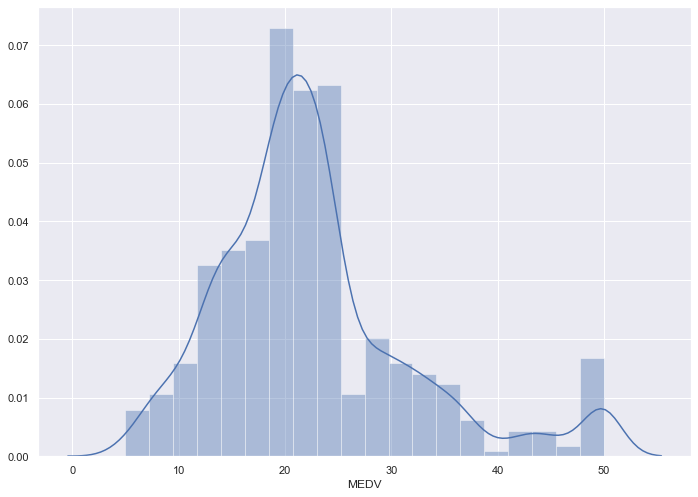

In [43]:
#plot the distribution of the target variable MEDV
sns.set(rc = {'figure.figsize':(11.7,8.27)})
sns.distplot(housing['MEDV'], bins = 20)
plt.show()

We observe that the values of MEDV are normally distributed with few outliers.

In [44]:
# check if there is correlation between the features
corr = housing.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


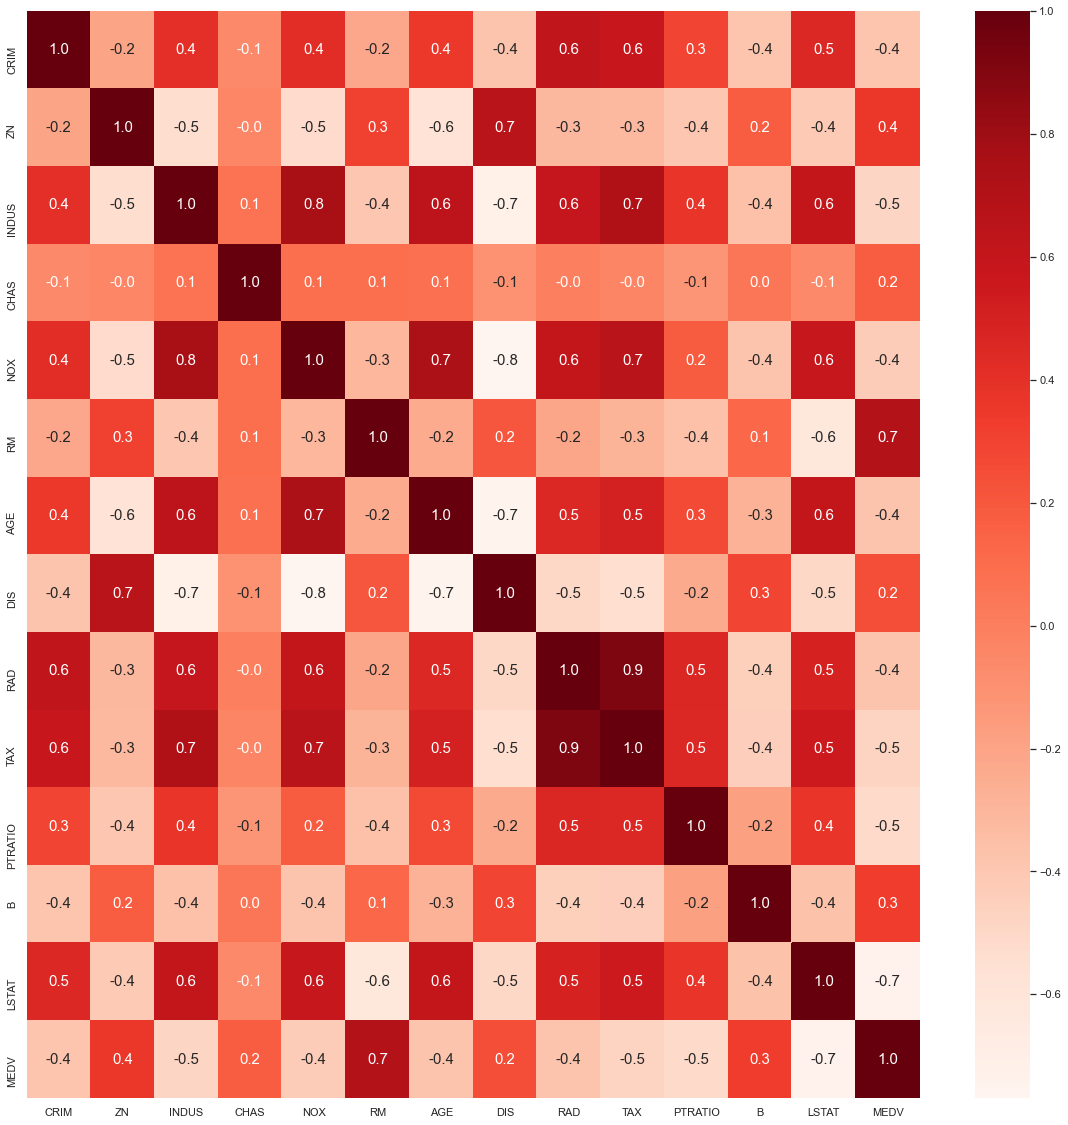

In [45]:
#plot the heatmap of feature correlation 
plt.figure(figsize = (20,20))
sns.heatmap(corr,
           cbar = True,
           fmt = '.1f',
           annot = True,
           annot_kws = {'size':15},
           cmap = 'Reds')

Each square shows the correlation between the variables on each axis(ranging from -1 to +1).
Values closer to zero means there is no linear trend between the two variables.
Values close to 1, means the correlation is the more positively correlated; i.e. as one increases so does the other
and the closer to 1 the stronger this relationship is. 
A correlation closer to -1 is similar,but instead of both increasing one variable will decrease as the other increases. 

From the heatmap and the corr output, we can see that the features RAD and TAX have a correlation of 0.9 or they are closely related to each other. And we can drop one of them. Same goes for the features DIS and AGE, which have a correlation of -0.75.

Also we see that RM has a strong +ve correlation with MEDV(0.7) and LSAT has a high -ve correlation.(-0.75)

In [46]:
#separate the features and responses
X = housing.drop('MEDV',axis = 1)
y = housing['MEDV']

### Model Building

We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [47]:
#Split the housing data to training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [48]:
#Train the model
from sklearn.linear_model import LinearRegression

#Create a linear regressor 
lm = LinearRegression()

#Train the model using the training sets
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
#value of coefficients
lm.coef_

array([-1.22569795e-01,  5.56776996e-02, -8.83428230e-03,  4.69344849e+00,
       -1.44357828e+01,  3.28008033e+00, -3.44778157e-03, -1.55214419e+00,
        3.26249618e-01, -1.40665500e-02, -8.03274915e-01,  9.35368715e-03,
       -5.23477529e-01])

In [50]:
#value of y-intercept 
lm.intercept_

36.357041376595205


### Model Evaluation on Training data
We will evaluate our model using several metrtics - R-Squared, Adjusted R-Squared, MAE, MSE and RMSE. 

In [51]:
#make predictions on train data
y_pred = lm.predict(X_train)

In [52]:
#model evaluation
from sklearn import metrics

#r-squared
rsquared = metrics.r2_score(y_train,y_pred)
rsquared

0.7465991966746854

𝑅-squared : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable. Higher the value, better is the model performance.

Here 75% of the variation can be explained by our fitted linear regression model.

In [59]:
#Adjusted r-squared
Adjusted_rsquared  = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adjusted_rsquared

0.736910342429894

Adjusted 𝑅-Squared :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.
R-squared tends to reward you for including too many independent variables in a regression model, and it doesn’t provide any incentive to stop adding more. The adjusted R-squared adjusts for the number of terms in the model.

Adjusted r-squared - 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model

n: The number of observations

k: The number of predictor variables

Here the Adjusted 𝑅-Squared value is 74%, which is less than the R-squared value as expected.

In [23]:
#mean absolute error 
metrics.mean_absolute_error(y_train,y_pred)

3.08986109497113

MAE is the mean of the absolute value of the errors. MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. Lower values are better. 

Here the value is 3.08, which is low.

In [54]:
#mean squared error
metrics.mean_squared_error(y_train,y_pred)

19.07368870346903

The mean square error (MSE) is the  the average squared difference between the estimated values and what is estimated.
There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.

Here the MSE is 19.07, which is high.

In [55]:
#root mean squared error
np.sqrt(metrics.mean_squared_error(y_train,y_pred))

4.367343437774162

The RMSE is the square root of the variance of the residuals. Lower values of RMSE indicate better fit. 

RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. Lower values of RMSE indicate better fit.

The RMSE for our linear model is 4.36.

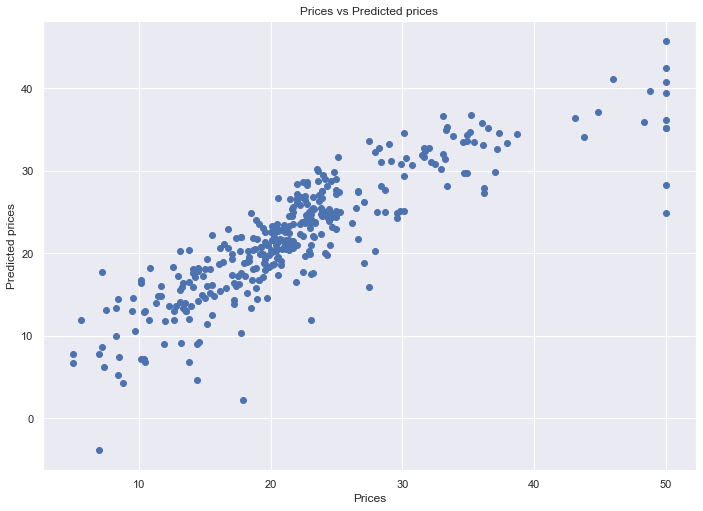

In [26]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

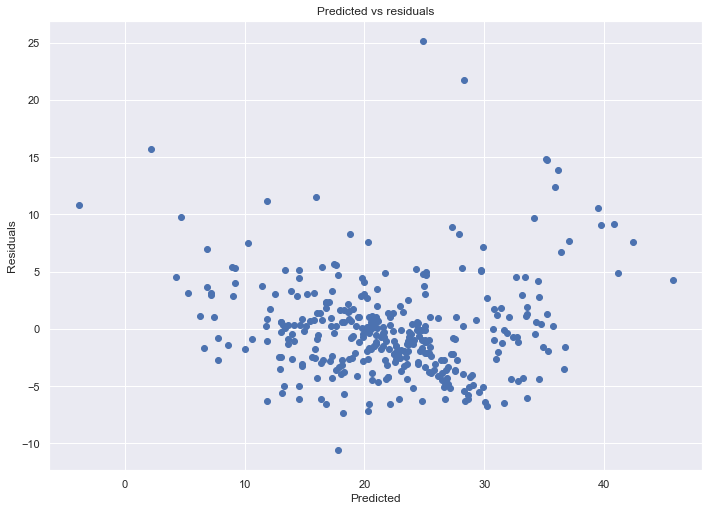

In [27]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied.

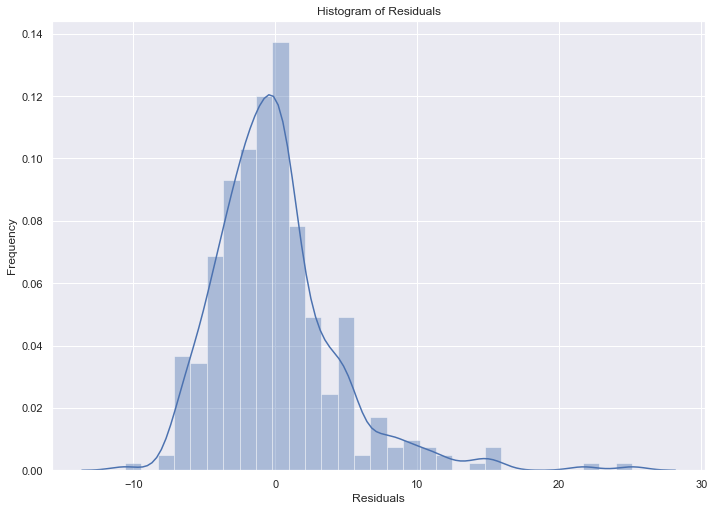

In [28]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied.

###### Model Evaluation on testing data

In [29]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [60]:
#Check the metrics for the test data
rsquared_test = metrics.r2_score(y_test,y_test_pred)
rsquared_test

0.7121818377409195

In [62]:
#Adjusted R-squared
Adjusted_rsquared_test = 1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adjusted_rsquared_test

0.6850685326005713

In [63]:
#Mean Absolute error
metrics.mean_absolute_error(y_test, y_test_pred)

3.8590055923707407

In [64]:
#Mean squared error
metrics.mean_squared_error(y_test, y_test_pred)

30.053993307124127

In [65]:
#Root Mean square error
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

5.482152251362974